# Lego Product Analysis

Authors: Christina DaSilva, Bourama Sidibe\
Course: IST-718\
Section: Sunday 7:30pm\
Submission Date: 12-21-2022

#OBTAIN

##File Preparation

In [ ]:
# THIS IS ONLY REQUIRED WHEN LOADING IN COLAB
# Mount Google Drive for file access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Package Imports

In [ ]:
# Package Imports
import pandas as pd # dataframes
import numpy as np  # arrays and math functions
import seaborn as sea # visuals
import matplotlib.pyplot as plt # plots
plt.style.use('fivethirtyeight')

# Other packages to consider:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification

In [ ]:
# Prophet time series model
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Prophet time series model
import timeit
from prophet import Prophet

##Reading in Source Files

In [ ]:
# Read in Lego data from csv files on Google Drive
colors_filename = 'drive/MyDrive/IST718/FinalProject/lego_files/colors.csv'
inventories_filename = 'drive/MyDrive/IST718/FinalProject/lego_files/inventories.csv'
inventory_parts_filename = 'drive/MyDrive/IST718/FinalProject/lego_files/inventory_parts.csv'
inventory_sets_filename = 'drive/MyDrive/IST718/FinalProject/lego_files/inventory_sets.csv'
part_categories_filename = 'drive/MyDrive/IST718/FinalProject/lego_files/part_categories.csv'
parts_filename = 'drive/MyDrive/IST718/FinalProject/lego_files/parts.csv'
sets_filename = 'drive/MyDrive/IST718/FinalProject/lego_files/sets.csv'
themes_filename = 'drive/MyDrive/IST718/FinalProject/lego_files/themes.csv'

# Create a dataframe for each .CSV file
colors_df = pd.read_csv(colors_filename)
inventories_df = pd.read_csv(inventories_filename)
inventory_parts_df = pd.read_csv(inventory_parts_filename)
inventory_sets_df = pd.read_csv(inventory_sets_filename)
part_categories_df = pd.read_csv(part_categories_filename)
parts_df = pd.read_csv(parts_filename)
sets_df = pd.read_csv(sets_filename)
themes_df = pd.read_csv(themes_filename)

## About the Source Data

Initial Data Frames:

> *colors_df\
inventories_df\
inventory_parts_df\
inventory_sets_df\
part_categories_df\
parts_df\
sets_df\
themes_df*



In [ ]:
# Print some information about the colors dataframe
# colors_df

colors_df.info()
print('Successfully read data into Colors Dataframe. Shape: {row} rows and {col} columns'.format(row = colors_df.shape[0], col = colors_df.shape[1]), '\n')
colors_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        135 non-null    int64 
 1   name      135 non-null    object
 2   rgb       135 non-null    object
 3   is_trans  135 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.3+ KB
Successfully read data into Colors Dataframe. Shape: 135 rows and 4 columns 



,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [ ]:
# Print some information about the inventories dataframe
# inventories_df

inventories_df.info()
print('Successfully read data into Inventories Dataframe. Shape: {row} rows and {col} columns'.format(row = inventories_df.shape[0], col = inventories_df.shape[1]), '\n')
inventories_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       11681 non-null  int64 
 1   version  11681 non-null  int64 
 2   set_num  11681 non-null  object
dtypes: int64(2), object(1)
memory usage: 273.9+ KB
Successfully read data into Inventories Dataframe. Shape: 11681 rows and 3 columns 



,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [ ]:
# Print some information about the inventory parts dataframe
# inventory_parts_df

inventory_parts_df.info()
print('Successfully read data into Inventory Parts Dataframe. Shape: {row} rows and {col} columns'.format(row = inventory_parts_df.shape[0], col = inventory_parts_df.shape[1]), '\n')
inventory_parts_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580251 entries, 0 to 580250
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   inventory_id  580251 non-null  int64 
 1   part_num      580251 non-null  object
 2   color_id      580251 non-null  int64 
 3   quantity      580251 non-null  int64 
 4   is_spare      580251 non-null  object
dtypes: int64(3), object(2)
memory usage: 22.1+ MB
Successfully read data into Inventory Parts Dataframe. Shape: 580251 rows and 5 columns 



,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


In [ ]:
# Print some information about the inventory sets dataframe
# inventory_sets_df

inventory_sets_df.info()
print('Successfully read data into Inventory Sets Dataframe. Shape: {row} rows and {col} columns'.format(row = inventory_sets_df.shape[0], col = inventory_sets_df.shape[1]), '\n')
inventory_sets_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2846 entries, 0 to 2845
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  2846 non-null   int64 
 1   set_num       2846 non-null   object
 2   quantity      2846 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 66.8+ KB
Successfully read data into Inventory Sets Dataframe. Shape: 2846 rows and 3 columns 



,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [ ]:
# Print some information about the part categories dataframe
# part_categories_df

part_categories_df.info()
print('Successfully read data into Part Categories Dataframe. Shape: {row} rows and {col} columns'.format(row = part_categories_df.shape[0], col = part_categories_df.shape[1]), '\n')
part_categories_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      57 non-null     int64 
 1   name    57 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.0+ KB
Successfully read data into Part Categories Dataframe. Shape: 57 rows and 2 columns 



,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special


In [ ]:
# Print some information about the parts dataframe
# parts_df

parts_df.info()
print('Successfully read data into Parts Dataframe. Shape: {row} rows and {col} columns'.format(row = parts_df.shape[0], col = parts_df.shape[1]), '\n')
parts_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25993 entries, 0 to 25992
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   part_num     25993 non-null  object
 1   name         25993 non-null  object
 2   part_cat_id  25993 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 609.3+ KB
Successfully read data into Parts Dataframe. Shape: 25993 rows and 3 columns 



,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


In [ ]:
# Print some information about the sets dataframe
# sets_df

sets_df.info()
print('Successfully read data into Sets Dataframe. Shape: {row} rows and {col} columns'.format(row = sets_df.shape[0], col = sets_df.shape[1]), '\n')
sets_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11673 entries, 0 to 11672
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    11673 non-null  object
 1   name       11673 non-null  object
 2   year       11673 non-null  int64 
 3   theme_id   11673 non-null  int64 
 4   num_parts  11673 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 456.1+ KB
Successfully read data into Sets Dataframe. Shape: 11673 rows and 5 columns 



,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [ ]:
# Print some information about the themes dataframe
# themes_df

themes_df.info()
print('Successfully read data into Themes Dataframe. Shape: {row} rows and {col} columns'.format(row = themes_df.shape[0], col = themes_df.shape[1]), '\n')
themes_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         614 non-null    int64  
 1   name       614 non-null    object 
 2   parent_id  503 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ KB
Successfully read data into Themes Dataframe. Shape: 614 rows and 3 columns 



,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


#SCRUB

##Merging Data Frames

In [ ]:
# Merge dataframes to match up part color data with inventory by year
# colors ->  inventory parts -> inventories -> sets
#
# Use the following IDs to merge:
# Colors (colors.id to inventory_parts.color_id) -> 
# Inventory Parts (inventory_parts.inventory_id to inventories.id) -> 
# Inventories (inventories.set_num to sets.set_num) -> 
# Sets

In [ ]:
# Merge Step 1: Merge part colors and inventory parts
color_invpart_df = pd.merge(colors_df, inventory_parts_df, left_on='id', right_on='color_id').groupby(['name','quantity','inventory_id'], as_index=False)['quantity'].sum()
color_invpart_df.head()

,name,inventory_id,quantity
0,Aqua,747,2
1,Aqua,1286,1
2,Aqua,1307,1
3,Aqua,1853,1
4,Aqua,2688,1


In [ ]:
# Merge Step 2: Merge with inventories
color_invpart_inventories_df = pd.merge(color_invpart_df, inventories_df, left_on='inventory_id', right_on='id').groupby(['name','quantity','inventory_id','id','set_num'], as_index=False)['quantity'].sum()
color_invpart_inventories_df#.head()

,name,inventory_id,id,set_num,quantity
0,Aqua,1286,1286,7524-1,1
1,Aqua,1307,1307,10829-1,1
2,Aqua,1853,1853,5836-1,1
3,Aqua,2688,2688,7549-1,1
4,Aqua,3643,3643,1385-1,1
...,...,...,...,...,...
213960,[No Color],216,216,1089-1,24
213961,[No Color],6455,6455,7417-1,24
213962,[No Color],12078,12078,9631-1,24
213963,[No Color],3168,3168,7418-1,25


In [ ]:
# Merge Step 3: Merge with sets

color_invpart_inventories_sets_df = pd.merge(color_invpart_inventories_df, sets_df, left_on='set_num', right_on='set_num')

###### Set aside new df to use for prophet analysis
color_prophet_df = color_invpart_inventories_sets_df
color_prophet_df.rename(columns={'year':'Year', 'name_x':'Color', 'quantity':'Quantity'})

# Continue merging color qty by year dataframe
color_invpart_inventories_sets_df = color_invpart_inventories_sets_df.groupby(['year','name_x'], as_index=False).agg({'quantity':sum})
color_qty_year_df = color_invpart_inventories_sets_df
color_qty_year_df=color_qty_year_df.rename(columns={'year':'Year', 'name_x': 'Color','quantity':'Quantity'})

color_qty_year_df

,Year,Color,Quantity
0,1950,Blue,6
1,1950,Bright Green,4
2,1950,Green,6
3,1950,Light Green,2
4,1950,Medium Blue,2
...,...,...,...
2078,2017,Unknown,41
2079,2017,White,8830
2080,2017,Yellow,1956
2081,2017,Yellowish Green,131


##Feature Generation

###Timeframe groupings (Decades and Eras)

In [ ]:
# Feature creation: Decade attribute
# Adapted from: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

# create a new dataframe with colors quantities by decade
color_qty_decade_df=color_qty_year_df

# create a list of our conditions
conditions = [
    (color_qty_year_df['Year'] <= 1959),
    (color_qty_year_df['Year'] > 1959) & (color_qty_year_df['Year'] < 1970),
    (color_qty_year_df['Year'] > 1969) & (color_qty_year_df['Year'] < 1980),
    (color_qty_year_df['Year'] > 1979) & (color_qty_year_df['Year'] < 1990),
    (color_qty_year_df['Year'] > 1989) & (color_qty_year_df['Year'] < 2000),
    (color_qty_year_df['Year'] > 1999) & (color_qty_year_df['Year'] < 2010),
    (color_qty_year_df['Year'] > 2009)
    ]

# create a list of the values we want to assign for each condition
values = ['1950s', '1960s', '1970s', '1980s','1990s','2000s','2010s']
#values = [1950, 1960, 1970, 1980, 1990, 2000, 2010]

# create a new column and use np.select to assign values to it using our lists as arguments
color_qty_decade_df['Decade'] = np.select(conditions, values)

color_qty_decade_df = color_qty_decade_df.filter(['Color','Quantity','Decade'])

color_qty_decade_df = color_qty_decade_df.groupby(['Decade','Color'])['Quantity'].sum().to_frame().reset_index()
         
# display updated DataFrame
#color_qty_decade_df.head(10)
color_qty_decade_df.tail(50)


,Decade,Color,Quantity
299,2010s,Light Gray,48
300,2010s,Light Green,3
301,2010s,Light Lime,5
302,2010s,Light Purple,2
303,2010s,Light Yellow,3
304,2010s,Lime,10445
305,2010s,Maersk Blue,404
306,2010s,Magenta,2677
307,2010s,Medium Azure,3617
308,2010s,Medium Blue,5096


In [ ]:
# Feature creation: Era attribute
# Adapted from: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

# create a new dataframe with colors quantities by era (three groupings)
color_qty_eras_df=color_qty_year_df

# create a list of our conditions
conditions = [
    (color_qty_year_df['Year'] <= 1979),
    (color_qty_year_df['Year'] > 1979) & (color_qty_year_df['Year'] < 2000),
    (color_qty_year_df['Year'] > 1999) 
    ]

# create a list of the values we want to assign for each condition
values = ['Early Years (1950-1979)', 'Middle Years (1980-1999)', 'Present Years (2000-Present)']

# create a new column and use np.select to assign values to it using our lists as arguments
color_qty_eras_df['Era'] = np.select(conditions, values)

color_qty_eras_df = color_qty_eras_df.filter(['Color','Quantity','Era'])

color_qty_eras_df = color_qty_eras_df.groupby(['Era','Color'])['Quantity'].sum().to_frame().reset_index()
         
# display updated DataFrame
#color_qty_eras_df.head(10)
color_qty_eras_df.tail(50)


,Era,Color,Quantity
164,Present Years (2000-Present),Pearl Dark Gray,2325
165,Present Years (2000-Present),Pearl Gold,11002
166,Present Years (2000-Present),Pearl Light Gold,29
167,Present Years (2000-Present),Pearl Light Gray,3507
168,Present Years (2000-Present),Pearl Very Light Gray,5
169,Present Years (2000-Present),Pearl White,33
170,Present Years (2000-Present),Pink,174
171,Present Years (2000-Present),Purple,385
172,Present Years (2000-Present),Red,101691
173,Present Years (2000-Present),Reddish Brown,46846


###Generic Color Mapping and Groupings

In [ ]:
# Get all unique colors to create color group mapping
unique_colors = color_qty_year_df.Color.unique()

unique_colors_df = pd.DataFrame(unique_colors, columns = ['UniqueColors'])

unique_colors_df.to_string()

'                 UniqueColors\n0                        Blue\n1                Bright Green\n2                       Green\n3                 Light Green\n4                 Medium Blue\n5               Medium Orange\n6                         Red\n7                 Trans-Clear\n8                       White\n9                      Yellow\n10                 Light Gray\n11                 [No Color]\n12                 Royal Blue\n13                      Black\n14            Metallic Silver\n15                Milky White\n16                Trans-Green\n17                  Trans-Red\n18               Trans-Yellow\n19                      Brown\n20                Maersk Blue\n21              Chrome Silver\n22                  Dark Gray\n23            Trans-Dark Blue\n24                    Unknown\n25               Earth Orange\n26             Fabuland Brown\n27                       Lime\n28                        Tan\n29           Trans-Light Blue\n30           Trans-Neon Green\n31     

In [ ]:
# Map each unique color to a more general color group to reduce the number of individual colors
# Color groupings include: 
#     Blues, Greens, Metallics, Neutrals, Oranges, Purples, Reds, Yellows

color_mapping = {'Blue':'Blues', 'Bright Green':'Greens', 'Green':'Greens', 'Light Green':'Greens', 'Medium Blue':'Blues', 'Medium Orange':'Oranges', 'Red':'Reds', 'Trans-Clear':'Neutrals', 'White':'Neutrals', 'Yellow':'Yellows', 'Light Gray':'Neutrals', '[No Color]':'Neutrals', 'Royal Blue':'Blues', 'Black':'Neutrals', 'Metallic Silver':'Metallics', 'Milky White':'Neutrals', 'Trans-Green':'Greens', 'Trans-Red':'Reds', 'Trans-Yellow':'Yellows', 'Brown':'Neutrals', 'Maersk Blue':'Blues', 'Chrome Silver':'Metallics', 'Dark Gray':'Neutrals', 'Trans-Dark Blue':'Blues', 'Unknown':'Neutrals', 'Earth Orange':'Oranges', 'Fabuland Brown':'Neutrals', 'Lime':'Greens', 'Tan':'Neutrals', 'Trans-Light Blue':'Blues', 'Trans-Neon Green':'Greens', 'Chrome Gold':'Metallics', 'Glow In Dark Opaque':'Metallics', 'Pink':'Reds', 'Bright Light Blue':'Blues', 'Medium Dark Pink':'Reds', 'Orange':'Oranges', 'Reddish Brown':'Reds', 'Trans-Neon Orange':'Oranges', 'Dark Pink':'Reds', 'Light Pink':'Reds', 'Light Violet':'Purples', 'Light Yellow':'Yellows', 'Medium Green':'Greens', 'Light Blue':'Blues', 'Purple':'Purples', 'Light Salmon':'Oranges', 'Metallic Gold':'Metallics', 'Rust':'Reds', 'Salmon':'Oranges', 'Chrome Blue':'Blues', 'Dark Orange':'Oranges', 'Dark Turquoise':'Blues', 'Light Bluish Gray':'Blues', 'Chrome Green':'Greens', 'Glitter Trans-Dark Pink':'Metallics', 'Light Turquoise':'Blues', 'Medium Lime':'Greens', 'Medium Violet':'Purples', 'Trans-Black':'Neutrals', 'Trans-Dark Pink':'Reds', 'Violet':'Purples', 'Aqua':'Blues', 'Flat Silver':'Metallics', 'Glitter Trans-Purple':'Metallics', 'Pearl Light Gold':'Metallics', 'Sand Green':'Greens', 'Trans-Purple':'Purples', 'Very Light Orange':'Oranges', 'Chrome Antique Brass':'Metallics', 'Chrome Pink':'Reds', 'Copper':'Metallics', 'Dark Blue':'Blues', 'Dark Red':'Reds', 'Metallic Green':'Greens', 'Pearl Light Gray':'Neutrals', 'Sand Blue':'Blues', 'Sand Purple':'Purples', 'Sand Red':'Reds', 'Trans-Medium Blue':'Blues', 'Trans-Neon Yellow':'Yellows', 'Dark Tan':'Neutrals', 'Flesh':'Neutrals', 'Light Orange':'Oranges', 'Magenta':'Reds', 'Metal Blue':'Blues', 'Pearl Dark Gray':'Grays', 'Pearl Gold':'Metallics', 'Pearl Very Light Gray':'Grays', 'Bright Pink':'Reds', 'Dark Bluish Gray':'Blues', 'Dark Green':'Greens', 'Flat Dark Gold':'Metallics', 'Glitter Trans-Clear':'Metallics', 'Light Flesh':'Neutrals', 'Pearl White':'Neutrals', 'Sky Blue':'Blues', 'Trans-Bright Green':'Greens', 'Trans-Orange':'Oranges', 'Trans-Pink':'Reds', 'Trans-Very Lt Blue':'Blues', 'Very Light Gray':'Neutrals', 'Blue-Violet':'Purples', 'Bright Light Orange':'Oranges', 'Bright Light Yellow':'Yellows', 'Dark Flesh':'Neutrals', 'Dark Purple':'Purples', 'Light Lime':'Greens', 'Light Purple':'Purples', 'Very Light Bluish Gray':'Blues', 'Dark Blue-Violet':'Purples', 'Glow In Dark Trans':'Metallics', 'Glow in Dark White':'Metallics', 'Medium Lavender':'Purples', 'Speckle Black-Silver':'Metallics', 'Trans Light Royal Blue':'Blues', 'Trans-Light Purple':'Purples', 'Speckle Black-Copper':'Neutrals', 'Speckle DBGray-Silver':'Neutrals', 'Dark Brown':'Neutrals', 'Chrome Black':'Neutrals', 'Medium Azure':'Blues', 'Medium Dark Flesh':'Neutrals', 'Speckle Black-Gold':'Metallics', 'Dark Azure':'Blues', 'Lavender':'Purples', 'Light Aqua':'Blues', 'Olive Green':'Greens', 'Yellowish Green':'Greens', 'Glitter Trans-Light Blue':'Metallics'}
color_mapping

{'Blue': 'Blues',
 'Bright Green': 'Greens',
 'Green': 'Greens',
 'Light Green': 'Greens',
 'Medium Blue': 'Blues',
 'Medium Orange': 'Oranges',
 'Red': 'Reds',
 'Trans-Clear': 'Neutrals',
 'White': 'Neutrals',
 'Yellow': 'Yellows',
 'Light Gray': 'Neutrals',
 '[No Color]': 'Neutrals',
 'Royal Blue': 'Blues',
 'Black': 'Neutrals',
 'Metallic Silver': 'Metallics',
 'Milky White': 'Neutrals',
 'Trans-Green': 'Greens',
 'Trans-Red': 'Reds',
 'Trans-Yellow': 'Yellows',
 'Brown': 'Neutrals',
 'Maersk Blue': 'Blues',
 'Chrome Silver': 'Metallics',
 'Dark Gray': 'Neutrals',
 'Trans-Dark Blue': 'Blues',
 'Unknown': 'Neutrals',
 'Earth Orange': 'Oranges',
 'Fabuland Brown': 'Neutrals',
 'Lime': 'Greens',
 'Tan': 'Neutrals',
 'Trans-Light Blue': 'Blues',
 'Trans-Neon Green': 'Greens',
 'Chrome Gold': 'Metallics',
 'Glow In Dark Opaque': 'Metallics',
 'Pink': 'Reds',
 'Bright Light Blue': 'Blues',
 'Medium Dark Pink': 'Reds',
 'Orange': 'Oranges',
 'Reddish Brown': 'Reds',
 'Trans-Neon Orange': '

In [ ]:
# Function for assignment of broader color groupings
# Adapted from: https://stackoverflow.com/questions/62567406/pandas-check-if-a-substring-exists-in-another-column-then-create-a-new-column-w

def check_color(x):
    for key in color_mapping:
        if key.lower() in x.lower():
            return color_mapping[key]
    return ''

In [ ]:
# Assign color group to color breakdown by Era
color_qty_eras_df['ColorGroup']  = color_qty_eras_df['Color'] .map(lambda x: check_color(x))
colorgroup_qty_eras_df = color_qty_eras_df.groupby(['Era','ColorGroup'], as_index=False).agg({'Quantity':sum})
colorgroup_qty_eras_df

,Era,ColorGroup,Quantity
0,Early Years (1950-1979),Blues,12649
1,Early Years (1950-1979),Greens,894
2,Early Years (1950-1979),Metallics,34
3,Early Years (1950-1979),Neutrals,42039
4,Early Years (1950-1979),Oranges,2
5,Early Years (1950-1979),Reds,21393
6,Early Years (1950-1979),Yellows,12472
7,Middle Years (1980-1999),Blues,34314
8,Middle Years (1980-1999),Greens,9489
9,Middle Years (1980-1999),Metallics,1113


In [ ]:
# Assign color group to color breakdown by Era
color_qty_eras_df['ColorGroup']  = color_qty_eras_df['Color'].map(lambda x: check_color(x))
colorgroup_qty_eras_df = color_qty_eras_df.groupby(['Era','ColorGroup'], as_index=False).agg({'Quantity':sum})
colorgroup_qty_eras_df

,Era,ColorGroup,Quantity
0,Early Years (1950-1979),Blues,12649
1,Early Years (1950-1979),Greens,894
2,Early Years (1950-1979),Metallics,34
3,Early Years (1950-1979),Neutrals,42039
4,Early Years (1950-1979),Oranges,2
5,Early Years (1950-1979),Reds,21393
6,Early Years (1950-1979),Yellows,12472
7,Middle Years (1980-1999),Blues,34314
8,Middle Years (1980-1999),Greens,9489
9,Middle Years (1980-1999),Metallics,1113


In [ ]:
# Assign color group to color breakdown by Decade
color_qty_decade_df['ColorGroup']  = color_qty_decade_df['Color'].map(lambda x: check_color(x))
colorgroup_qty_decade_df = color_qty_decade_df.groupby(['Decade','ColorGroup'], as_index=False).agg({'Quantity':sum})
colorgroup_qty_decade_df

,Decade,ColorGroup,Quantity
0,1950s,Blues,560
1,1950s,Greens,47
2,1950s,Metallics,12
3,1950s,Neutrals,2368
4,1950s,Oranges,2
5,1950s,Reds,982
6,1950s,Yellows,431
7,1960s,Blues,3204
8,1960s,Greens,262
9,1960s,Metallics,2


In [ ]:
# Assign color group to color breakdown by Year
color_qty_year_df['ColorGroup']  = color_qty_year_df['Color'].map(lambda x: check_color(x))
colorgroup_qty_year_df = color_qty_year_df.groupby(['Year','ColorGroup'], as_index=False).agg({'Quantity':sum})
colorgroup_qty_year_df

,Year,ColorGroup,Quantity
0,1950,Blues,8
1,1950,Greens,12
2,1950,Neutrals,25
3,1950,Oranges,2
4,1950,Reds,12
...,...,...,...
411,2017,Neutrals,30766
412,2017,Oranges,2226
413,2017,Purples,1127
414,2017,Reds,8799


In [ ]:
# Assign color group to prophet model dataframe: color breakdown by Year
color_prophet_df['ColorGroup']  = color_qty_year_df['Color'].map(lambda x: check_color(x))
color_prophet_df = color_qty_year_df.groupby(['Year','ColorGroup'], as_index=False).agg({'Quantity':sum})
color_prophet_df

,Year,ColorGroup,Quantity
0,1950,Blues,8
1,1950,Greens,12
2,1950,Neutrals,25
3,1950,Oranges,2
4,1950,Reds,12
...,...,...,...
411,2017,Neutrals,30766
412,2017,Oranges,2226
413,2017,Purples,1127
414,2017,Reds,8799


In [ ]:
early_era_qty_df = colorgroup_qty_eras_df.loc[colorgroup_qty_eras_df['Era'] == 'Early Years (1950-1979)'].drop(columns=['Era'])
early_era_qty_df

,ColorGroup,Quantity
0,Blues,12649
1,Greens,894
2,Metallics,34
3,Neutrals,42039
4,Oranges,2
5,Reds,21393
6,Yellows,12472


In [ ]:
mid_era_qty_df = colorgroup_qty_eras_df.loc[colorgroup_qty_eras_df['Era'] == 'Middle Years (1980-1999)']
mid_era_qty_df

,Era,ColorGroup,Quantity
7,Middle Years (1980-1999),Blues,34314
8,Middle Years (1980-1999),Greens,9489
9,Middle Years (1980-1999),Metallics,1113
10,Middle Years (1980-1999),Neutrals,205438
11,Middle Years (1980-1999),Oranges,1152
12,Middle Years (1980-1999),Purples,567
13,Middle Years (1980-1999),Reds,50977
14,Middle Years (1980-1999),Yellows,41390


In [ ]:
present_era_qty_df = colorgroup_qty_eras_df.loc[colorgroup_qty_eras_df['Era'] == 'Present Years (2000-Present)']
present_era_qty_df

,Era,ColorGroup,Quantity
15,Present Years (2000-Present),Blues,473471
16,Present Years (2000-Present),Greens,74492
17,Present Years (2000-Present),Metallics,24107
18,Present Years (2000-Present),Neutrals,611543
19,Present Years (2000-Present),Oranges,37455
20,Present Years (2000-Present),Purples,8934
21,Present Years (2000-Present),Reds,189396
22,Present Years (2000-Present),Yellows,75857


#EXPLORE

##Initial Data Frames

> *colors_df\
inventories_df\
inventory_parts_df\
inventory_sets_df\
part_categories_df\
parts_df\
sets_df\
themes_df*



##Scrubbed Dataframes for Analysis

>*color_qty_year_df* - contains the quantity of each color by each year\
>*color_qty_decade_df* - contains the quantity of each color by each decade\
>*color_qty_eras_df* - contains the quantity of each color by three eras: \
*  Early Years (1950-1979)
*  Middle Years (1980-1999)
*  Present Years (2000-2017)

>*colorgroup_qty_year_df* - contains the quantity of each broader color group by year\
>*colorgroup_qty_decade_df* - contains the quantity of each broader color group by decade\
>*colorgroup_qty_eras_df* - contains the quantity of each broader color group by each era

>*early_era_qty_df* - contains the quantity of each color group in the early era (1950-1979)\
>*mid_era_qty_df* - contains the quantity of each color group in the mid era (1980-1999)\
>*present_era_qty_df* - contains the quantity of each color group in the present era (2000-2017)

##Exploratory Data Analysis

In [ ]:
# Info on color_qty_eras_df
color_qty_eras_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Era         214 non-null    object
 1   Color       214 non-null    object
 2   Quantity    214 non-null    int64 
 3   ColorGroup  214 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.8+ KB


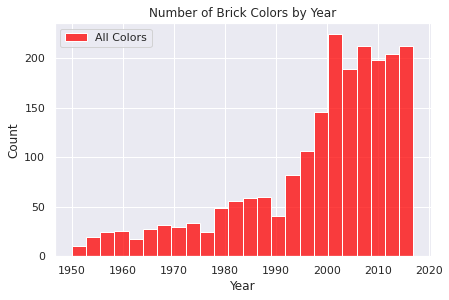

In [ ]:
# Visualize the total number of brick colors by year

# Set a gray background
sea.set(style="darkgrid")

sea.histplot(data=color_qty_year_df, x="Year", color="red", label="All Colors")#, kde=True)

plt.title('Number of Brick Colors by Year')
plt.legend() 
plt.show()

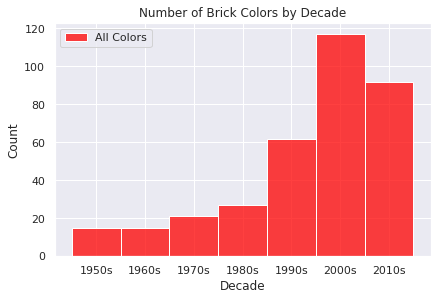

In [ ]:
# Visualize the total number of brick colors by decade
sea.histplot(data=color_qty_decade_df, x="Decade", color="red", label="All Colors")#, kde=True)
plt.title('Number of Brick Colors by Decade')
plt.legend() 
plt.show()

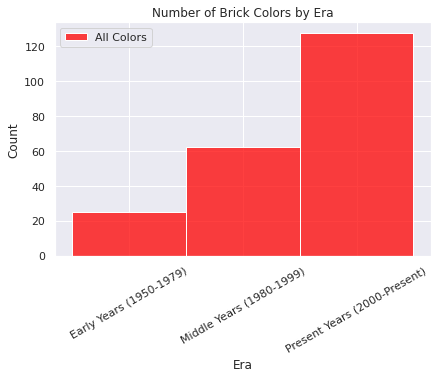

In [ ]:
# Visualize the total number of brick colors by era
sea.histplot(data=color_qty_eras_df, x="Era", color="red", label="All Colors")#, kde=True)
plt.title('Number of Brick Colors by Era')
plt.xticks(rotation=30)
plt.legend() 
plt.show()

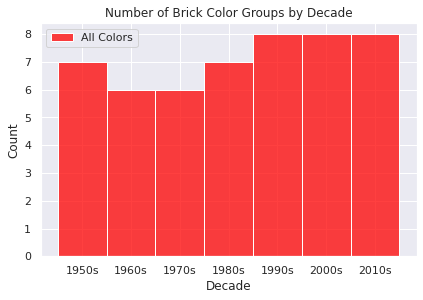

In [ ]:
# Visualize the total number of brick color groups by decade
sea.histplot(data=colorgroup_qty_decade_df, x="Decade", color="red", label="All Colors")#, kde=True)
plt.title('Number of Brick Color Groups by Decade')
plt.legend() 
plt.show()

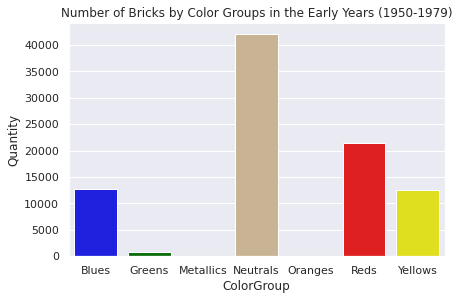

In [ ]:
# Visualize the number of bricks per color groups in the early era
clrs = ['Blue','Green', 'Grey', 'Tan', 'Orange','Red','Yellow']
sea.barplot(data=early_era_qty_df, x='ColorGroup', y='Quantity',palette=clrs)
plt.title('Number of Bricks by Color Groups in the Early Years (1950-1979)')
plt.show()

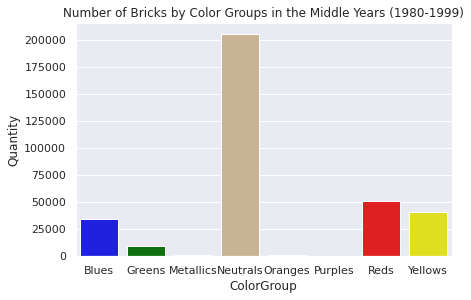

In [ ]:
# Visualize the number of bricks per color groups in the mid era
clrs = ['Blue','Green', 'Grey', 'Tan', 'Orange','Purple','Red','Yellow']
sea.barplot(data=mid_era_qty_df, x='ColorGroup', y='Quantity', palette=clrs)
plt.title('Number of Bricks by Color Groups in the Middle Years (1980-1999)')
plt.show()

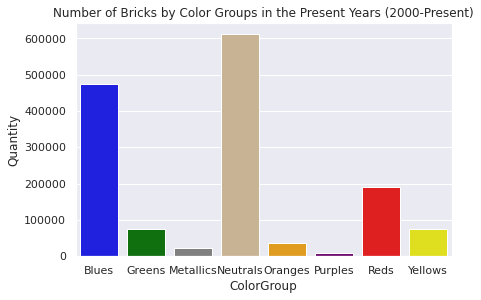

In [ ]:
# Visualize the number of bricks per color groups in the present era
clrs = ['Blue','Green', 'Grey', 'Tan', 'Orange','Purple','Red','Yellow']
sea.barplot(data=present_era_qty_df, x='ColorGroup', y='Quantity',palette=clrs)
plt.title('Number of Bricks by Color Groups in the Present Years (2000-Present)')
plt.show()

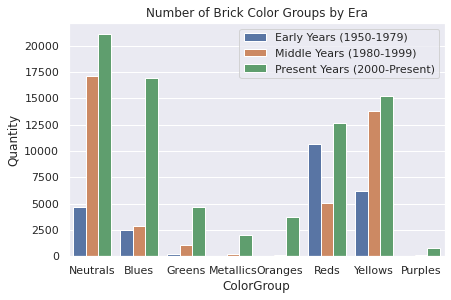

In [ ]:
# Color group quantities broken down by Era
sea.barplot(data=color_qty_eras_df, x="ColorGroup", y="Quantity", hue='Era', ci=None)
plt.title('Number of Brick Color Groups by Era')
plt.legend() 
plt.show()

#MODEL

##Time Series Model

In [ ]:
# Convert year data to date format for model
color_prophet_df['Date']=pd.to_datetime(color_prophet_df.Year, format='%Y')
color_prophet_df

,Year,ColorGroup,Quantity,Date
0,1950,Blues,8,1950-01-01
1,1950,Greens,12,1950-01-01
2,1950,Neutrals,25,1950-01-01
3,1950,Oranges,2,1950-01-01
4,1950,Reds,12,1950-01-01
...,...,...,...,...
411,2017,Neutrals,30766,2017-01-01
412,2017,Oranges,2226,2017-01-01
413,2017,Purples,1127,2017-01-01
414,2017,Reds,8799,2017-01-01


###Time Series Model for Quantities of Blue Legos

####SCRUB

In [ ]:
# Rename columns for prophet
prophet_blue_df = color_prophet_df.rename(index=str, columns={"Quantity": "y", "Date": "ds"})
prophet_blue_df = prophet_blue_df[prophet_blue_df['ColorGroup']=='Blues']
prophet_blue_df = prophet_blue_df.drop(columns = ['ColorGroup','Year'])
prophet_blue_df

,y,ds
0,8,1950-01-01
6,1,1953-01-01
11,13,1954-01-01
16,185,1955-01-01
21,6,1956-01-01
...,...,...
376,35375,2013-01-01
384,44146,2014-01-01
392,51010,2015-01-01
400,55609,2016-01-01


####MODEL

In [ ]:
# Set the uncertainty interval to 95% (the Prophet default is 80%)
blue_prophet_model = Prophet(interval_width=0.95)
blue_prophet_model.fit(prophet_blue_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7zff7ui/keubhxqw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7zff7ui/pomv0qsy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96930', 'data', 'file=/tmp/tmpy7zff7ui/keubhxqw.json', 'init=/tmp/tmpy7zff7ui/pomv0qsy.json', 'output', 'file=/tmp/tmpy7zff7ui/prophet_model4jvjs216/prophet_model-20221214072059.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:20:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
test_blue_future_dates = blue_prophet_model.make_future_dataframe(periods=13, freq='W')
test_blue_future_dates.head()

,ds
0,1950-01-01
1,1953-01-01
2,1954-01-01
3,1955-01-01
4,1956-01-01


In [ ]:
forecast_blue_prophet = blue_prophet_model.predict(test_blue_future_dates)
forecast_blue_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
74,2017-03-05,-16677.007200,-25553.523332,-8941.610759
75,2017-03-12,87694.458301,79636.128499,95625.243422
76,2017-03-19,134877.964173,126766.085580,142883.468347
77,2017-03-26,75354.945661,66922.187156,84412.396249
78,2017-04-02,-1973.621150,-10109.098583,5978.665920


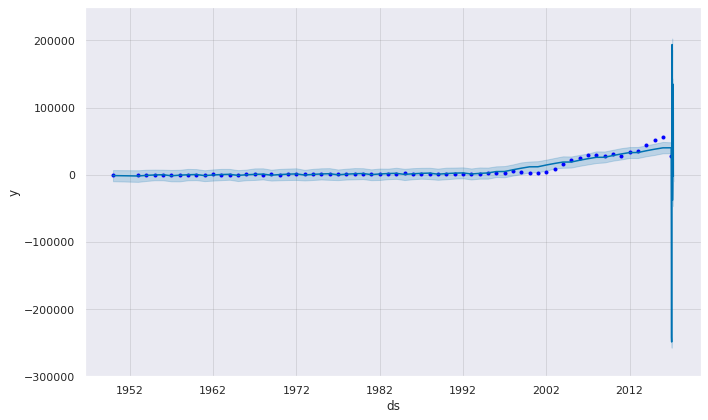

In [ ]:
blue_prophet_model.plot(forecast_blue_prophet, uncertainty=True)
plt.ylim(-300000, 250000)
plt.gca().get_lines()[0].set_color("blue")

####INTERPRET

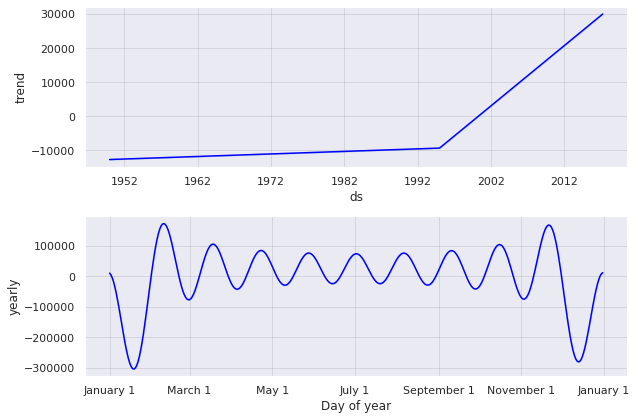

In [ ]:
blue_prophet_model.plot_components(forecast_blue_prophet)
for ax in plt.gcf().axes:
    ax.get_lines()[0].set_color("blue")

###Time Series Model for Quantities of Green Colored Legos

####SCRUB

In [ ]:
# Rename columns for prophet
prophet_green_df = color_prophet_df.rename(index=str, columns={"Quantity": "y", "Date": "ds"})
prophet_green_df = prophet_green_df[prophet_green_df['ColorGroup']=='Greens']
prophet_green_df = prophet_green_df.drop(columns = ['ColorGroup','Year'])
prophet_green_df

,y,ds
1,12,1950-01-01
7,13,1953-01-01
12,4,1954-01-01
17,6,1955-01-01
25,4,1957-01-01
...,...,...
377,5896,2013-01-01
385,6426,2014-01-01
393,6553,2015-01-01
401,6637,2016-01-01


####MODEL

In [ ]:
# Set the uncertainty interval to 95% (the Prophet default is 80%)
green_prophet_model = Prophet(interval_width=0.95)
green_prophet_model.fit(prophet_green_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7zff7ui/zbhg_2ds.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7zff7ui/8x1vbzmm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36788', 'data', 'file=/tmp/tmpy7zff7ui/zbhg_2ds.json', 'init=/tmp/tmpy7zff7ui/8x1vbzmm.json', 'output', 'file=/tmp/tmpy7zff7ui/prophet_model2312uq63/prophet_model-20221214072103.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:21:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
test_green_future_dates = green_prophet_model.make_future_dataframe(periods=13, freq='W')
test_green_future_dates.head()

,ds
0,1950-01-01
1,1953-01-01
2,1954-01-01
3,1955-01-01
4,1957-01-01


In [ ]:
forecast_green_prophet = green_prophet_model.predict(test_green_future_dates)
forecast_green_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
70,2017-03-05,6713.555469,4506.388518,9029.164986
71,2017-03-12,4925.733080,2444.159576,7293.932493
72,2017-03-19,4199.645022,1872.511341,6559.435085
73,2017-03-26,5286.977474,3035.636513,7595.432553
74,2017-04-02,6586.484790,4124.178647,8849.808031


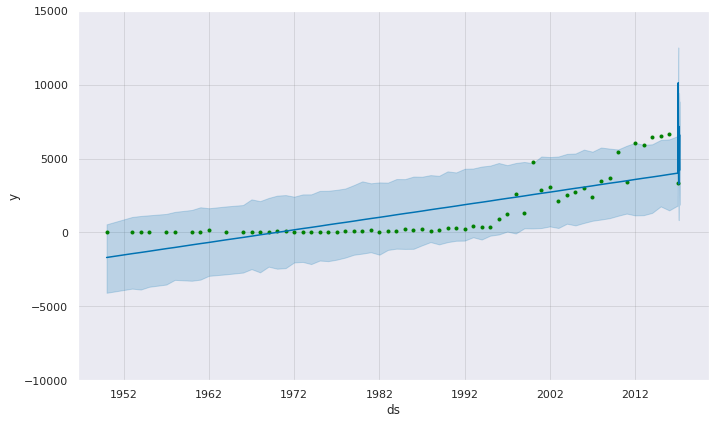

In [ ]:
green_prophet_model.plot(forecast_green_prophet, uncertainty=True)
plt.ylim(-10000, 15000)
plt.gca().get_lines()[0].set_color("green")

####INTERPRET

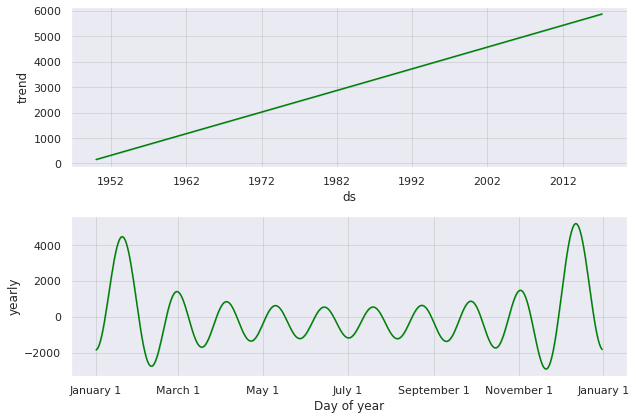

In [ ]:
green_prophet_model.plot_components(forecast_green_prophet)
for ax in plt.gcf().axes:
    ax.get_lines()[0].set_color("green")

###Time Series Model for Quantities of Neutral Colored Legos

####SCRUB

In [ ]:
# Rename columns for prophet
prophet_neutral_df = color_prophet_df.rename(index=str, columns={"Quantity": "y", "Date": "ds"})
prophet_neutral_df = prophet_neutral_df[prophet_neutral_df['ColorGroup']=='Neutrals']
prophet_neutral_df = prophet_neutral_df.drop(columns = ['ColorGroup','Year'])
prophet_neutral_df

,y,ds
2,25,1950-01-01
8,23,1953-01-01
13,71,1954-01-01
18,412,1955-01-01
22,153,1956-01-01
...,...,...
379,43347,2013-01-01
387,44450,2014-01-01
395,48833,2015-01-01
403,57396,2016-01-01


####MODEL

In [ ]:
# Set the uncertainty interval to 95% (the Prophet default is 80%)
neutral_prophet_model = Prophet(interval_width=0.95)
neutral_prophet_model.fit(prophet_neutral_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7zff7ui/fwezw465.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7zff7ui/5chs1d38.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32919', 'data', 'file=/tmp/tmpy7zff7ui/fwezw465.json', 'init=/tmp/tmpy7zff7ui/5chs1d38.json', 'output', 'file=/tmp/tmpy7zff7ui/prophet_modelbefbab6d/prophet_model-20221214072106.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:21:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
test_neutral_future_dates = neutral_prophet_model.make_future_dataframe(periods=13, freq='W')
test_neutral_future_dates.head()

,ds
0,1950-01-01
1,1953-01-01
2,1954-01-01
3,1955-01-01
4,1956-01-01


In [ ]:
forecast_neutral_prophet = neutral_prophet_model.predict(test_neutral_future_dates)
forecast_neutral_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
74,2017-03-05,-120904.519169,-130122.988095,-111856.079058
75,2017-03-12,163303.904208,153988.802536,172094.835069
76,2017-03-19,299501.398576,290063.983639,308809.327853
77,2017-03-26,141893.270574,133371.664534,150415.777090
78,2017-04-02,-72860.474167,-81725.209949,-64275.073044


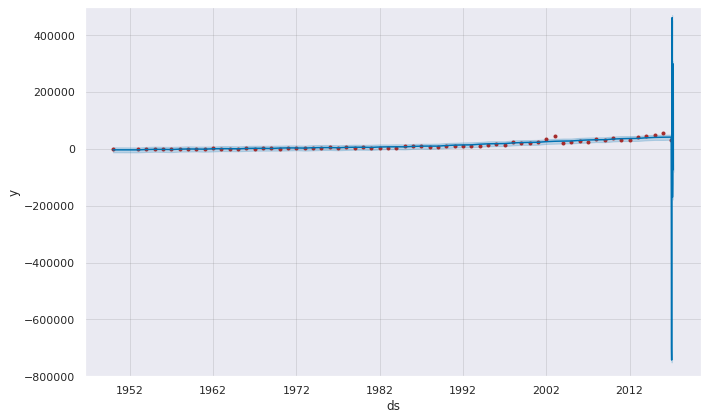

In [ ]:
neutral_prophet_model.plot(forecast_neutral_prophet, uncertainty=True)
plt.ylim(-800000, 500000)
plt.gca().get_lines()[0].set_color("brown")

####INTERPRET

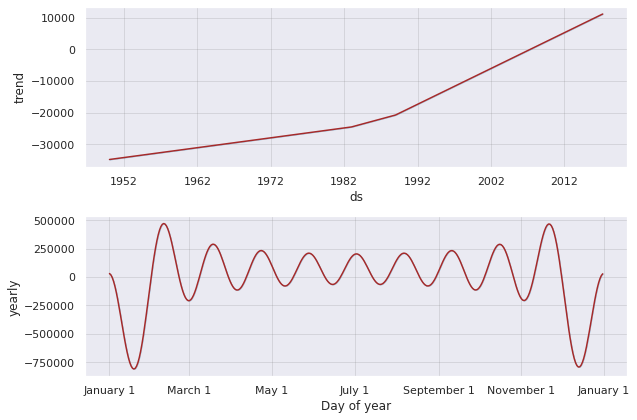

In [ ]:
neutral_prophet_model.plot_components(forecast_neutral_prophet)
for ax in plt.gcf().axes:
    ax.get_lines()[0].set_color("brown")

###Time Series Model for Quantities of Metallic Legos

####SCRUB

In [ ]:
# Rename columns for prophet
prophet_metallic_df = color_prophet_df.rename(index=str, columns={"Quantity": "y", "Date": "ds"})
prophet_metallic_df = prophet_metallic_df[prophet_metallic_df['ColorGroup']=='Metallics']
prophet_metallic_df = prophet_metallic_df.drop(columns = ['ColorGroup','Year'])
prophet_metallic_df

,y,ds
26,2,1957-01-01
32,10,1958-01-01
47,1,1961-01-01
53,1,1962-01-01
91,6,1970-01-01
112,12,1974-01-01
128,2,1977-01-01
195,64,1989-01-01
201,10,1990-01-01
207,12,1991-01-01


####MODEL

In [ ]:
# Set the uncertainty interval to 95% (the Prophet default is 80%)
metallic_prophet_model = Prophet(interval_width=0.95)
metallic_prophet_model.fit(prophet_metallic_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7zff7ui/bk018xtd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7zff7ui/v8ga48pl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29498', 'data', 'file=/tmp/tmpy7zff7ui/bk018xtd.json', 'init=/tmp/tmpy7zff7ui/v8ga48pl.json', 'output', 'file=/tmp/tmpy7zff7ui/prophet_modelxb8_xu0v/prophet_model-20221214072109.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:21:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
test_metallic_future_dates = metallic_prophet_model.make_future_dataframe(periods=13, freq='W')
test_metallic_future_dates.head()

,ds
0,1957-01-01
1,1958-01-01
2,1961-01-01
3,1962-01-01
4,1970-01-01


In [ ]:
forecast_metallic_prophet = metallic_prophet_model.predict(test_metallic_future_dates)
forecast_metallic_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
44,2017-03-05,1579.663917,-84.417218,3187.350677
45,2017-03-12,2904.052545,1347.840315,4556.250215
46,2017-03-19,3591.279631,1954.681913,5221.661521
47,2017-03-26,2891.769824,1351.417080,4564.860225
48,2017-04-02,1865.530967,242.823375,3661.594069


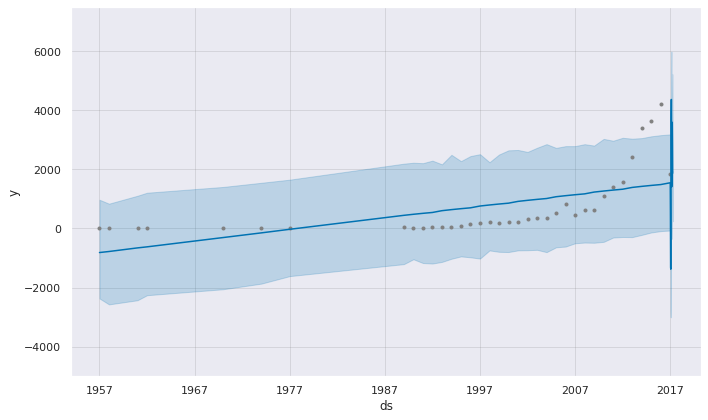

In [ ]:
metallic_prophet_model.plot(forecast_metallic_prophet, uncertainty=True)
plt.ylim(-5000, 7500)
for ax in plt.gcf().axes:
    ax.get_lines()[0].set_color("gray")

####INTERPRET

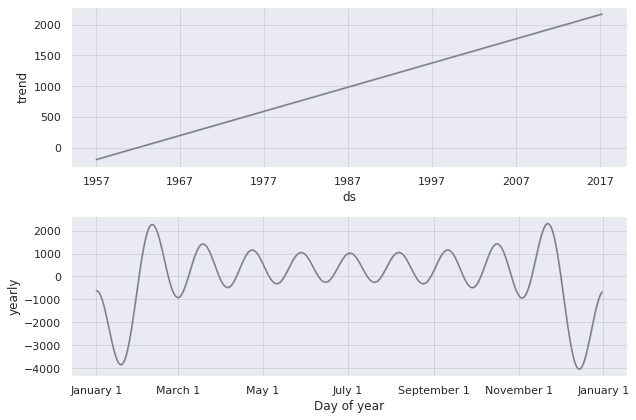

In [ ]:
metallic_prophet_model.plot_components(forecast_metallic_prophet)
for ax in plt.gcf().axes:
    ax.get_lines()[0].set_color("gray")
#    plt.title('Time Series for Metallic Brick Quantities')

###Time Series Model for Quantities of Orange Legos

####SCRUB

In [ ]:
# Rename columns for prophet
prophet_orange_df = color_prophet_df.rename(index=str, columns={"Quantity": "y", "Date": "ds"})
prophet_orange_df = prophet_orange_df[prophet_orange_df['ColorGroup']=='Oranges']
prophet_orange_df = prophet_orange_df.drop(columns = ['ColorGroup','Year'])
prophet_orange_df

,y,ds
3,2,1950-01-01
155,12,1982-01-01
161,2,1983-01-01
167,1,1984-01-01
173,3,1985-01-01
179,1,1986-01-01
185,3,1987-01-01
221,214,1993-01-01
228,25,1994-01-01
236,78,1995-01-01


####MODEL

In [ ]:
# Set the uncertainty interval to 95% (the Prophet default is 80%)
orange_prophet_model = Prophet(interval_width=0.95)
orange_prophet_model.fit(prophet_orange_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7zff7ui/wpwl37n4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7zff7ui/7z1mo03s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69888', 'data', 'file=/tmp/tmpy7zff7ui/wpwl37n4.json', 'init=/tmp/tmpy7zff7ui/7z1mo03s.json', 'output', 'file=/tmp/tmpy7zff7ui/prophet_modeltj8cr9y1/prophet_model-20221214072112.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:21:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [ ]:
test_orange_future_dates = orange_prophet_model.make_future_dataframe(periods=13, freq='W')
test_orange_future_dates.head()

,ds
0,1950-01-01
1,1982-01-01
2,1983-01-01
3,1984-01-01
4,1985-01-01


In [ ]:
forecast_orange_prophet = orange_prophet_model.predict(test_orange_future_dates)
forecast_orange_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
40,2017-03-05,4715.949213,2791.157145,6621.861064
41,2017-03-12,5891.477624,4039.037583,7794.819562
42,2017-03-19,5964.259447,4144.737616,7639.975681
43,2017-03-26,5033.797590,3300.736429,6837.170178
44,2017-04-02,4408.234206,2635.606081,6128.383640


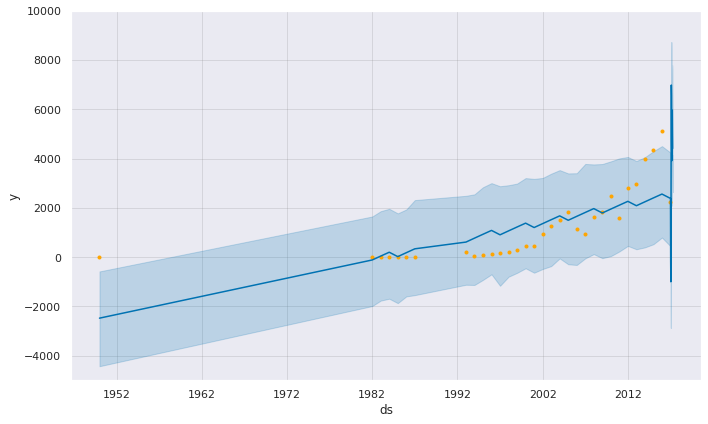

In [ ]:
orange_prophet_model.plot(forecast_orange_prophet, uncertainty=True)
plt.ylim(-5000, 10000)
for ax in plt.gcf().axes:
    ax.get_lines()[0].set_color("orange")

####INTERPRET

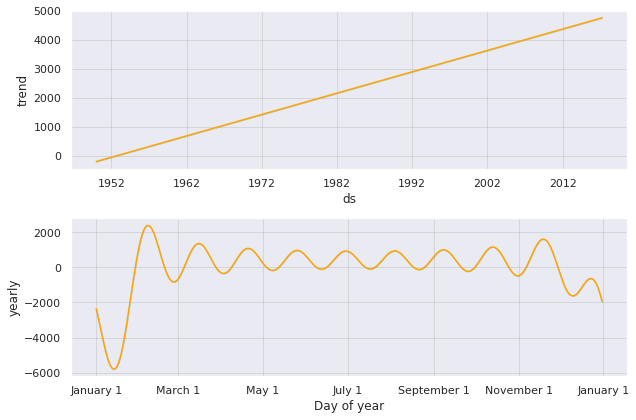

In [ ]:
orange_prophet_model.plot_components(forecast_orange_prophet)
for ax in plt.gcf().axes:
    ax.get_lines()[0].set_color("orange")
#    plt.title('Time Series for Orange Brick Quantities')

###Time Series Model for Quantities of Red Legos

####SCRUB

In [ ]:
# Rename columns for prophet
prophet_red_df = color_prophet_df.rename(index=str, columns={"Quantity": "y", "Date": "ds"})
prophet_red_df = prophet_red_df[prophet_red_df['ColorGroup']=='Reds']
prophet_red_df = prophet_red_df.drop(columns = ['ColorGroup','Year'])
prophet_red_df

,y,ds
4,12,1950-01-01
9,16,1953-01-01
14,69,1954-01-01
19,250,1955-01-01
23,63,1956-01-01
...,...,...
382,15184,2013-01-01
390,16610,2014-01-01
398,15979,2015-01-01
406,17958,2016-01-01


####MODEL

In [ ]:
# Set the uncertainty interval to 95% (the Prophet default is 80%)
red_prophet_model = Prophet(interval_width=0.95)
red_prophet_model.fit(prophet_red_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7zff7ui/gdkq9tix.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7zff7ui/p9046hig.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25657', 'data', 'file=/tmp/tmpy7zff7ui/gdkq9tix.json', 'init=/tmp/tmpy7zff7ui/p9046hig.json', 'output', 'file=/tmp/tmpy7zff7ui/prophet_model_ukxr9re/prophet_model-20221214072114.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:21:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
test_red_future_dates = red_prophet_model.make_future_dataframe(periods=13, freq='W')
test_red_future_dates.head()

,ds
0,1950-01-01
1,1953-01-01
2,1954-01-01
3,1955-01-01
4,1956-01-01


In [ ]:
forecast_red_prophet = red_prophet_model.predict(test_red_future_dates)
forecast_red_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
74,2017-03-05,-24047.478715,-27128.360790,-21230.076352
75,2017-03-12,42365.536009,39714.503828,45053.632080
76,2017-03-19,74937.001106,72219.959614,77709.506117
77,2017-03-26,38568.225689,35667.157800,41263.800635
78,2017-04-02,-11978.683876,-14665.105111,-9027.112506


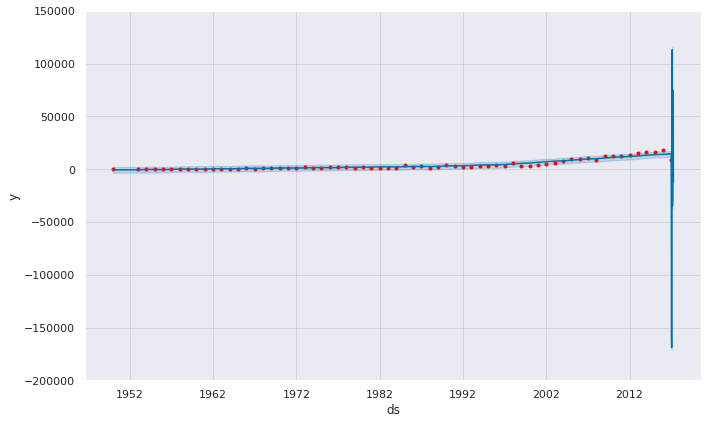

In [ ]:
red_prophet_model.plot(forecast_red_prophet, uncertainty=True)
plt.ylim(-200000, 150000)
for ax in plt.gcf().axes:
    ax.get_lines()[0].set_color("red")

####INTERPRET

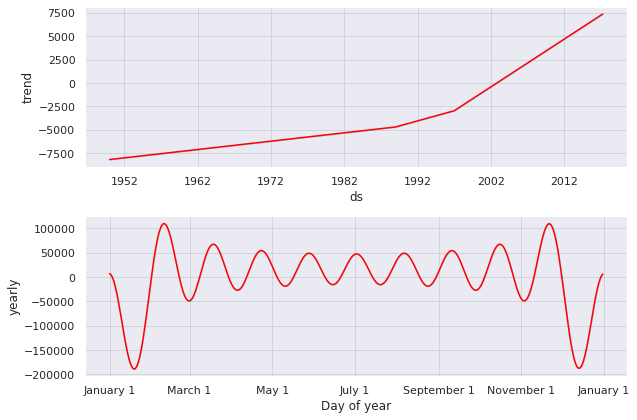

In [ ]:
red_prophet_model.plot_components(forecast_red_prophet)
for ax in plt.gcf().axes:
    ax.get_lines()[0].set_color("red")
#    plt.title('Time Series for Red Brick Quantities')

###Time Series Model for Quantities of Yellow Legos

####SCRUB

In [ ]:
# Rename columns for prophet
prophet_yellow_df = color_prophet_df.rename(index=str, columns={"Quantity": "y", "Date": "ds"})
prophet_yellow_df = prophet_yellow_df[prophet_yellow_df['ColorGroup']=='Yellows']
prophet_yellow_df = prophet_yellow_df.drop(columns = ['ColorGroup','Year'])
prophet_yellow_df

,y,ds
5,12,1950-01-01
10,13,1953-01-01
15,16,1954-01-01
20,185,1955-01-01
29,20,1957-01-01
...,...,...
383,5025,2013-01-01
391,5081,2014-01-01
399,5410,2015-01-01
407,6565,2016-01-01


####MODEL

In [ ]:
# Set the uncertainty interval to 95% (the Prophet default is 80%)
yellow_prophet_model = Prophet(interval_width=0.95)
yellow_prophet_model.fit(prophet_yellow_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7zff7ui/npfxb9m7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7zff7ui/p51cko60.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59907', 'data', 'file=/tmp/tmpy7zff7ui/npfxb9m7.json', 'init=/tmp/tmpy7zff7ui/p51cko60.json', 'output', 'file=/tmp/tmpy7zff7ui/prophet_modelq_7mpppg/prophet_model-20221214072118.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:21:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
test_yellow_future_dates = yellow_prophet_model.make_future_dataframe(periods=13, freq='W')
test_yellow_future_dates.head()

,ds
0,1950-01-01
1,1953-01-01
2,1954-01-01
3,1955-01-01
4,1957-01-01


In [ ]:
forecast_yellow_prophet = yellow_prophet_model.predict(test_yellow_future_dates)
forecast_yellow_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
72,2017-03-05,-11076.908625,-12741.055530,-9477.511953
73,2017-03-12,17339.013930,15830.548368,18788.650952
74,2017-03-19,31253.840476,29774.246390,32870.919426
75,2017-03-26,15670.129308,14065.349316,17196.615734
76,2017-04-02,-5961.786162,-7622.735317,-4431.632181


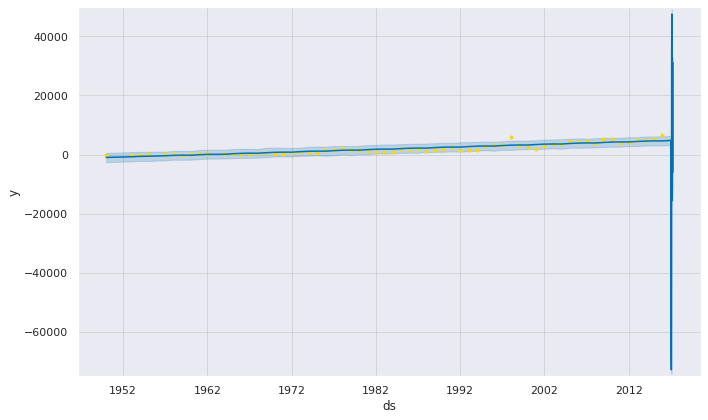

In [ ]:
yellow_prophet_model.plot(forecast_yellow_prophet, uncertainty=True)
plt.ylim(-75000, 50000)
for ax in plt.gcf().axes:
    ax.get_lines()[0].set_color("gold")

####INTERPRET

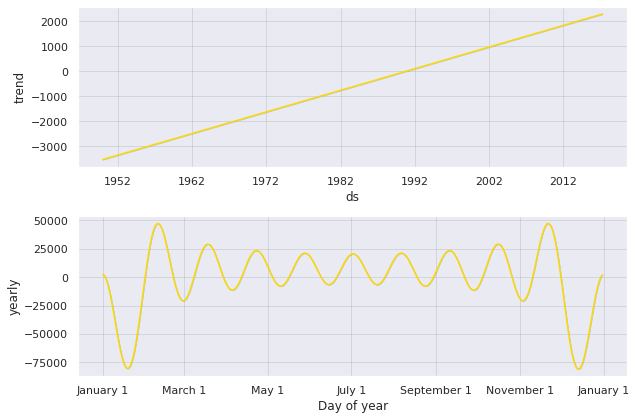

In [ ]:
yellow_prophet_model.plot_components(forecast_yellow_prophet)
for ax in plt.gcf().axes:
    ax.get_lines()[0].set_color("gold")
#    plt.title('Time Series for Yellow Brick Quantities')

###Time Series Model for Quantities of Purple Legos

####SCRUB

In [ ]:
# Rename columns for prophet
prophet_purple_df = color_prophet_df.rename(index=str, columns={"Quantity": "y", "Date": "ds"})
prophet_purple_df = prophet_purple_df[prophet_purple_df['ColorGroup']=='Purples']
prophet_purple_df = prophet_purple_df.drop(columns = ['ColorGroup','Year'])
prophet_purple_df

,y,ds
229,30,1994-01-01
237,14,1995-01-01
245,20,1996-01-01
253,8,1997-01-01
261,302,1998-01-01
269,193,1999-01-01
277,53,2000-01-01
285,124,2001-01-01
293,231,2002-01-01
301,156,2003-01-01


####MODEL

In [ ]:
# Set the uncertainty interval to 95% (the Prophet default is 80%)
purple_prophet_model = Prophet(interval_width=0.95)
purple_prophet_model.fit(prophet_purple_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7zff7ui/4wqamjbr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7zff7ui/j5nkuzcq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4556', 'data', 'file=/tmp/tmpy7zff7ui/4wqamjbr.json', 'init=/tmp/tmpy7zff7ui/j5nkuzcq.json', 'output', 'file=/tmp/tmpy7zff7ui/prophet_model_wu4r845/prophet_model-20221214072121.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:21:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

In [ ]:
test_purple_future_dates = purple_prophet_model.make_future_dataframe(periods=13, freq='W')
test_purple_future_dates.head()

,ds
0,1994-01-01
1,1995-01-01
2,1996-01-01
3,1997-01-01
4,1998-01-01


In [ ]:
forecast_purple_prophet = purple_prophet_model.predict(test_purple_future_dates)
forecast_purple_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
32,2017-03-05,38.876717,-650.069998,744.193767
33,2017-03-12,2657.104095,1920.436965,3411.354630
34,2017-03-19,3514.936159,2794.245730,4260.920544
35,2017-03-26,1828.101999,1092.490945,2594.372716
36,2017-04-02,57.101864,-686.661987,789.956064


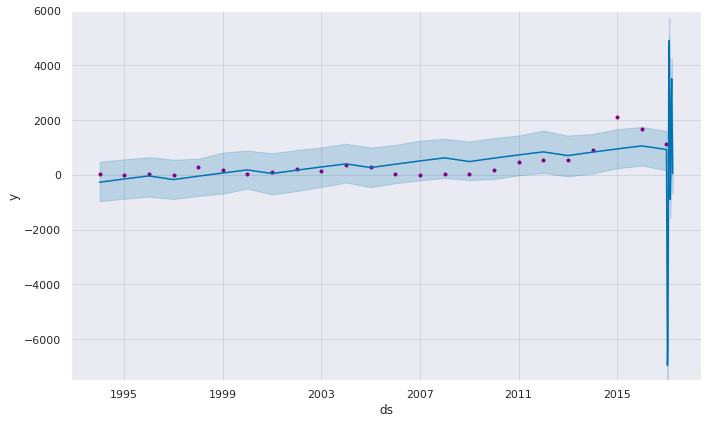

In [ ]:
purple_prophet_model.plot(forecast_purple_prophet, uncertainty=True)
plt.ylim(-7500, 6000)
for ax in plt.gcf().axes:
    ax.get_lines()[0].set_color("purple")

####INTERPRET

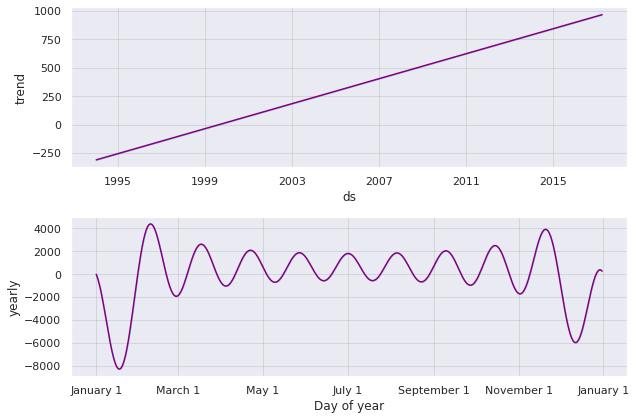

In [ ]:
purple_prophet_model.plot_components(forecast_purple_prophet)
for ax in plt.gcf().axes:
    ax.get_lines()[0].set_color("purple")
#    plt.title('Time Series for Purple Brick Quantities')

##SVM Attempt

In [ ]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
color_qty_year_df

,Year,Color,Quantity,Decade,Era,ColorGroup
0,1950,Blue,6,1950s,Early Years (1950-1979),Blues
1,1950,Bright Green,4,1950s,Early Years (1950-1979),Greens
2,1950,Green,6,1950s,Early Years (1950-1979),Greens
3,1950,Light Green,2,1950s,Early Years (1950-1979),Greens
4,1950,Medium Blue,2,1950s,Early Years (1950-1979),Blues
...,...,...,...,...,...,...
2078,2017,Unknown,41,2010s,Present Years (2000-Present),Neutrals
2079,2017,White,8830,2010s,Present Years (2000-Present),Neutrals
2080,2017,Yellow,1956,2010s,Present Years (2000-Present),Yellows
2081,2017,Yellowish Green,131,2010s,Present Years (2000-Present),Greens


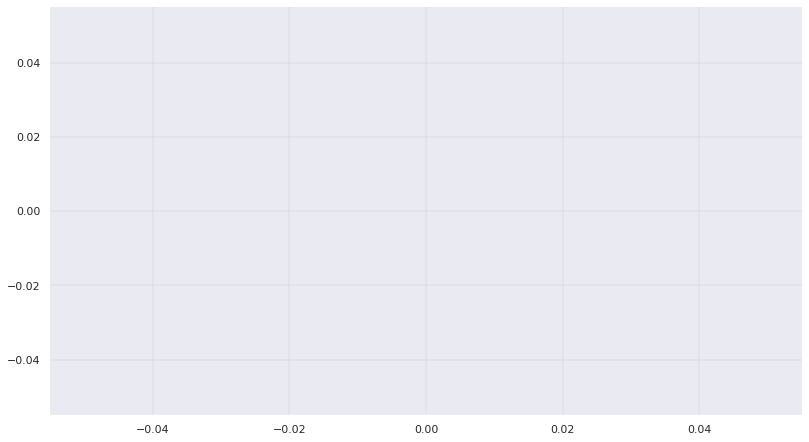

In [ ]:
# Adapted from: https://towardsdatascience.com/support-vector-machines-explained-with-python-examples-cb65e8172c85
# Hold out 20% of the dataset for training
size = color_qty_year_df.size
test_size = int(np.round(size * 0.2, 0))
features = color_qty_year_df.filter(['Year','Quantity'],axis=1)
label = color_qty_year_df.filter(['Color'],axis=1)

# Split dataset into training and testing sets
x_train = features[:-test_size].values
y_train = label[:-test_size].values
x_test = features[-test_size:].values
y_test = label[-test_size:].values

# Plotting the training set
fig, ax = plt.subplots(figsize=(12, 7))

# removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# adding major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(features[:-test_size]['Year'], features[:-test_size]['Quantity'], color="#8C7298")
plt.show()

In [ ]:
# Adapted from: https://www.baeldung.com/cs/svm-multiclass-classification
X = color_qty_year_df.filter(['Year','Quantity'],axis=1)
y = color_qty_year_df.filter(['Color'],axis=1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  6.95
F1 (Polynomial Kernel):  3.43


In [ ]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  2.16
F1 (RBF Kernel):  0.09


#Incomplete or inconclusive code to revisit at a future time

#SCRUB [FIRST ROUND]

###Merging Data Frames

In [ ]:
# Merge sets and themes dataframes

sets_themes_df = pd.merge(sets_df, themes_df, left_on='theme_id', right_on='id')
sets_themes_df

,set_num,name_x,year,theme_id,num_parts,id,name_y,parent_id
0,00-1,Weetabix Castle,1970,414,471,414,Castle,411.0
1,0011-2,Town Mini-Figures,1978,84,12,84,Supplemental,67.0
2,2181-1,Infomaniac,1997,84,4,84,Supplemental,67.0
3,300-1,T-Junction Road Plates,1978,84,2,84,Supplemental,67.0
4,301-1,Curved Road Plates,1978,84,2,84,Supplemental,67.0
...,...,...,...,...,...,...,...,...
11668,K6762-1,Western Kit,2002,475,3,475,Western,NaN
11669,K7623-1,Indiana Jones Classic Adventures Collection,2008,264,4,264,Indiana Jones,NaN
11670,llca27-1,Legoland Pirate with Parrot (Legoland California),2006,430,70,430,Pirates,425.0
11671,LLCA29-1,Pirate Treasure Chest Bank (LLCA Ambassador Pa...,2006,430,215,430,Pirates,425.0


In [ ]:
#########---IN PROGRESS---#########
# What questions do we want to answer?
# What data needs to be merged to answer those questions?  

In [ ]:
### UPDATE TO MERGE INVENTORY PARTS WITH SETS - this will join color data with years

# Merge part categories ->  parts -> inventory parts -> inventories -> inventory sets 
# in order to match up part categories by year

# Merge part categories and parts
pc_p_df = pd.merge(part_categories_df, parts_df, left_on='id', right_on='part_cat_id')
#pc_p_df

# Merge above with inventory parts
pcp_ip_df = pd.merge(pc_p_df, inventory_parts_df, left_on='part_num', right_on='part_num')
#pcp_ip_df

# Merge above with inventories
pcpip_i_df = pd.merge(pcp_ip_df, inventories_df, left_on='inventory_id', right_on='id')
#pcpip_i_df

# Merge above with sets
pcpipi_s_df = pd.merge(pcpip_i_df, sets_df, left_on='set_num', right_on='set_num')
#pcpipi_s_df

# Drop unnececssary columns
part_categories_by_year_df = pcpipi_s_df.filter(['name','name_x','year'])
part_categories_by_year_df.groupby(['year','name_x']).count()

name
year name_x                            
1950 Bricks                          26
     Windows and Doors               20
1953 Bricks                          14
     Windows and Doors                4
1954 Bricks                          46
...                                 ...
2017 Transportation - Sea and Air    82
     Tubes and Hoses                 30
     Wheels and Tyres               380
     Windows and Doors              255
     Windscreens and Fuselage       104

[2391 rows x 1 columns]

In [ ]:
# Feature creation: decade attribute
# Adapted from: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

# create a list of our conditions
conditions = [
    (part_categories_by_year_df['year'] <= 1959),
    (part_categories_by_year_df['year'] > 1959) & (part_categories_by_year_df['year'] < 1970),
    (part_categories_by_year_df['year'] > 1969) & (part_categories_by_year_df['year'] < 1980),
    (part_categories_by_year_df['year'] > 1979) & (part_categories_by_year_df['year'] < 1990),
    (part_categories_by_year_df['year'] > 1989) & (part_categories_by_year_df['year'] < 2000),
    (part_categories_by_year_df['year'] > 1999) & (part_categories_by_year_df['year'] < 2010),
    (part_categories_by_year_df['year'] > 2009)
    ]

# create a list of the values we want to assign for each condition
#values = ['1950s', '1960s', '1970s', '1980s','1990s','2000s','2010s']
values = [1950, 1960, 1970, 1980, 1990, 2000, 2010]

# create a new column and use np.select to assign values to it using our lists as arguments
part_categories_by_year_df['decade'] = np.select(conditions, values)

part_categories_by_decade_df = part_categories_by_year_df.filter(['name','name_x','decade'])

part_categories_by_decade_df1 = part_categories_by_decade_df.groupby(['decade','name_x'])['name'].count()
         
# display updated DataFrame
part_categories_by_decade_df.head(10)
#part_categories_by_decade_df.tail(50)


,name,name_x,decade
0,Basic Building Set with Train,Baseplates,1960
1,Basic Building Set with Train,Baseplates,1960
2,Basic Building Set with Train,Baseplates,1960
3,Basic Building Set with Train,Baseplates,1960
4,Basic Building Set with Train,Bricks Sloped,1960
5,Basic Building Set with Train,Bricks Sloped,1960
6,Basic Building Set with Train,Bricks Sloped,1960
7,Basic Building Set with Train,Bricks Sloped,1960
8,Basic Building Set with Train,Bricks Sloped,1960
9,Basic Building Set with Train,Bricks Sloped,1960


In [ ]:
part_categories_by_decade_df1

decade  name_x                      
1950    Baseplates                         7
        Bricks                           352
        Bricks Printed                    69
        Bricks Round and Cones            66
        Bricks Sloped                     27
                                        ... 
2010    Transportation - Sea and Air    1001
        Tubes and Hoses                  439
        Wheels and Tyres                3482
        Windows and Doors               2297
        Windscreens and Fuselage        1137
Name: name, Length: 300, dtype: int64

In [ ]:
# Change decade to string temporarily
part_categories_by_decade_df['decade'] = part_categories_by_decade_df['decade'].astype(str)
part_categories_by_decade_df

,name,name_x,decade
0,Basic Building Set with Train,Baseplates,1960
1,Basic Building Set with Train,Baseplates,1960
2,Basic Building Set with Train,Baseplates,1960
3,Basic Building Set with Train,Baseplates,1960
4,Basic Building Set with Train,Bricks Sloped,1960
...,...,...,...
580064,Plastic Figure - Sir JAYKO (Nestle Promotional),"Non-Buildable Figures (Duplo, Fabuland, etc)",2000
580065,Plastic Figure - Sir JAYKO (Nestle Promotional),"Non-Buildable Figures (Duplo, Fabuland, etc)",2000
580066,Plastic Figure - Sir SANTIS (Nestle Promotional),"Non-Buildable Figures (Duplo, Fabuland, etc)",2000
580067,Plastic Figure - Sir SANTIS (Nestle Promotional),"Non-Buildable Figures (Duplo, Fabuland, etc)",2000


In [ ]:
# Get count of set categories (name_x) by year - STILL NEED TO FIX
#part_categories_by_decade_df['Set Count'] = part_categories_by_decade_df('name')['name'].transform(count)

part_categories_by_decade_df['Set Count']=part_categories_by_decade_df.groupby('name_x')['name'].transform('count')
part_categories_by_decade_df
#part_categories_by_decade_df
#df['var1_count'] = df.groupby('var1')['var1'].transform('count')

,name,name_x,decade,Set Count
0,Basic Building Set with Train,Baseplates,1960,998
1,Basic Building Set with Train,Baseplates,1960,998
2,Basic Building Set with Train,Baseplates,1960,998
3,Basic Building Set with Train,Baseplates,1960,998
4,Basic Building Set with Train,Bricks Sloped,1960,37509
...,...,...,...,...
580064,Plastic Figure - Sir JAYKO (Nestle Promotional),"Non-Buildable Figures (Duplo, Fabuland, etc)",2000,216
580065,Plastic Figure - Sir JAYKO (Nestle Promotional),"Non-Buildable Figures (Duplo, Fabuland, etc)",2000,216
580066,Plastic Figure - Sir SANTIS (Nestle Promotional),"Non-Buildable Figures (Duplo, Fabuland, etc)",2000,216
580067,Plastic Figure - Sir SANTIS (Nestle Promotional),"Non-Buildable Figures (Duplo, Fabuland, etc)",2000,216


In [ ]:
# Change decade back to int
part_categories_by_decade_df['decade'] = part_categories_by_decade_df['decade'].astype(int)
part_categories_by_decade_df

,name,name_x,decade,Set Count
0,Basic Building Set with Train,Baseplates,1960,998
1,Basic Building Set with Train,Baseplates,1960,998
2,Basic Building Set with Train,Baseplates,1960,998
3,Basic Building Set with Train,Baseplates,1960,998
4,Basic Building Set with Train,Bricks Sloped,1960,37509
...,...,...,...,...
580064,Plastic Figure - Sir JAYKO (Nestle Promotional),"Non-Buildable Figures (Duplo, Fabuland, etc)",2000,216
580065,Plastic Figure - Sir JAYKO (Nestle Promotional),"Non-Buildable Figures (Duplo, Fabuland, etc)",2000,216
580066,Plastic Figure - Sir SANTIS (Nestle Promotional),"Non-Buildable Figures (Duplo, Fabuland, etc)",2000,216
580067,Plastic Figure - Sir SANTIS (Nestle Promotional),"Non-Buildable Figures (Duplo, Fabuland, etc)",2000,216


In [ ]:
bricks_year_df = part_categories_by_decade_df[part_categories_by_decade_df['name_x']=='Bricks']
bricks_year_df

,name,name_x,decade,Set Count
21,Basic Building Set with Train,Bricks,1960,54110
22,Basic Building Set with Train,Bricks,1960,54110
23,Basic Building Set with Train,Bricks,1960,54110
24,Basic Building Set with Train,Bricks,1960,54110
25,Basic Building Set with Train,Bricks,1960,54110
...,...,...,...,...
549062,Individual 4 x 4 Corner Bricks,Bricks,1950,54110
549063,Individual 4 x 4 Corner Bricks,Bricks,1950,54110
549064,Individual 4 x 4 Corner Bricks,Bricks,1950,54110
549065,Individual 4 x 4 Corner Bricks,Bricks,1950,54110


In [ ]:
#use red for bars with value less than 10 and green for all other bars
cols = ['red' if x='Reds' else 'blue' for x in early_era_qty_df.ColorGroup]

#create barplot using specified colors
sea.barplot(x=early_era_qty_df.ColorGroup, y=early_era_qty_df.Quantity, palette=cols)

SyntaxError: ignored

In [ ]:
sea.barplot(data=early_era_qty_df, x='Era', col='ColorGroup', multiple='stack', col_wrap=4) #<-- set how many columns of graphs with col_wrap

ValueError: ignored

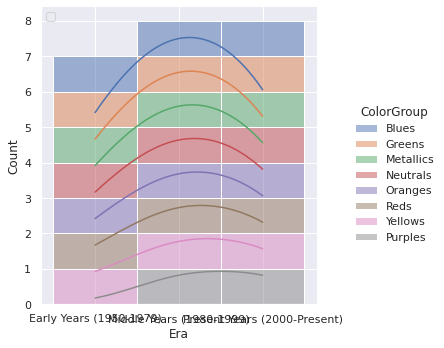

In [ ]:
sea.displot(data=colorgroup_qty_eras_df, x="Era", hue="ColorGroup", multiple="stack", kde=True)
#sea.displot(data=green_qty_eras_df, x="Era", color="green", label="Greens", kde=True)

plt.legend() 
plt.show()

In [ ]:
sea.color_palette('Paired')

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [ ]:
color_prophet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        416 non-null    int64 
 1   ColorGroup  416 non-null    object
 2   Quantity    416 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 9.9+ KB


#EXPLORE [FIRST ROUND]

Initial Data Frames:

> *colors_df\
inventories_df\
inventory_parts_df\
inventory_sets_df\
part_categories_df\
parts_df\
sets_df\
themes_df*


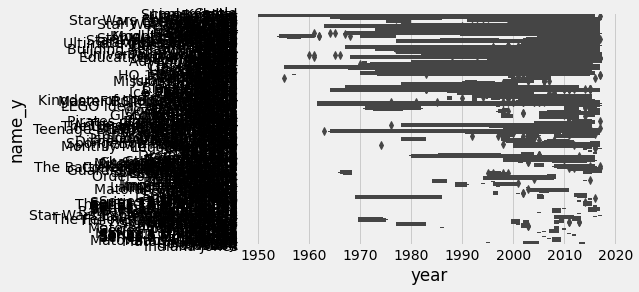

In [ ]:
#########---IN PROGRESS---#########
# Visualize set themes by year
sea.boxplot(data=sets_themes_df, x='year', y='name_y')

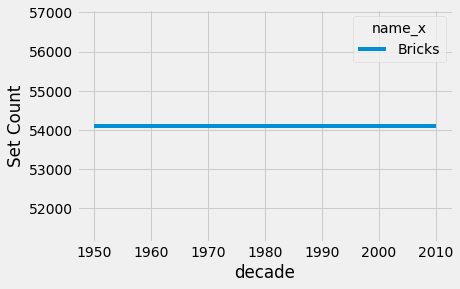

In [ ]:
g=sea.lineplot(data=bricks_year_df, x='decade', y='Set Count', hue='name_x')


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


ValueError: ignored

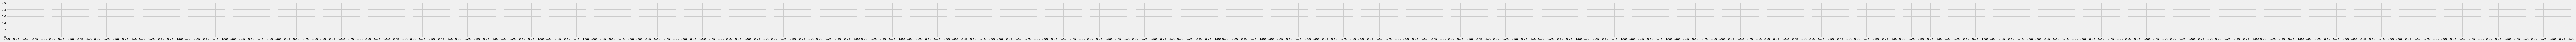

In [ ]:
g1 = sea.FacetGrid(part_categories_by_decade_df, col="name_x")
g1.map(sea.barplot, x='decade',y='Set Count', hue='name_x')

In [ ]:
# for performing mathematical operations
import numpy as np 

# for data processing, CSV file I/O 
import pandas as pd 

# visualizing inventory_parts that has most colors using matplotlib
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the data from the csv files into a dataframe
themes = pd.read_csv('/content/themes.csv', index_col=0)
sets = pd.read_csv('/content/sets.csv', index_col=0)
parts = pd.read_csv('/content/parts.csv', index_col=0)
part_categories = pd.read_csv('/content/part_categories.csv', index_col=0)
inventories = pd.read_csv('/content/inventories.csv', index_col=0)
inventory_sets = pd.read_csv('/content/inventory_sets.csv', index_col=0)
inventory_parts = pd.read_csv('/content/inventory_parts.csv', index_col=0)
colors = pd.read_csv('/content/colors.csv', index_col=0)

In [ ]:
# Read in Lego data from csv files on Google Drive
colors_filename = 'drive/MyDrive/IST718/FinalProject/lego_files/colors.csv'
inventories_filename = 'drive/MyDrive/IST718/FinalProject/lego_files/inventories.csv'
inventory_parts_filename = 'drive/MyDrive/IST718/FinalProject/lego_files/inventory_parts.csv'
inventory_sets_filename = 'drive/MyDrive/IST718/FinalProject/lego_files/inventory_sets.csv'
part_categories_filename = 'drive/MyDrive/IST718/FinalProject/lego_files/part_categories.csv'
parts_filename = 'drive/MyDrive/IST718/FinalProject/lego_files/parts.csv'
sets_filename = 'drive/MyDrive/IST718/FinalProject/lego_files/sets.csv'
themes_filename = 'drive/MyDrive/IST718/FinalProject/lego_files/themes.csv'

# Create a dataframe for each .CSV file
colors_df = pd.read_csv(colors_filename)
inventories_df = pd.read_csv(inventories_filename)
inventory_parts_df = pd.read_csv(inventory_parts_filename)
inventory_sets_df = pd.read_csv(inventory_sets_filename)
part_categories_df = pd.read_csv(part_categories_filename)
parts_df = pd.read_csv(parts_filename)
sets_df = pd.read_csv(sets_filename)
themes_df = pd.read_csv(themes_filename)

In [ ]:
# Read colors data
colors = pd.read_csv('/content/colors.csv')

# Print the first few rows
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [ ]:
num_colors = len(colors.name.unique())
print(num_colors)

135


In [ ]:
colors_summary = colors.groupby('is_trans').count()
colors_summary

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [ ]:
colors_summary = colors.groupby('rgb').count()
colors_summary

,id,name,is_trans
rgb,,,
000000,3,3,3
0020A0,1,1,1
0033B2,1,1,1
0055BF,1,1,1
008F9B,1,1,1
...,...,...,...
FECCCF,1,1,1
FF800D,1,1,1
FFA70B,1,1,1


In [ ]:
# explore the sets 

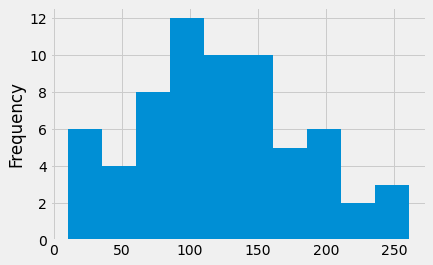

In [ ]:
# Read sets data as `sets`
sets = pd.read_csv('/content/sets.csv')

# Create a summary of average number of parts by year: `parts_by_year`
PBY = sets.groupby('year').num_parts.mean()

# Plot trends in average number of parts by year
PBY.plot(kind='hist');

In [ ]:
# Legos theme other  years

In [ ]:
themes_year = sets[['year', 'theme_id']].\
                 groupby('year', as_index=False).agg({'theme_id': pd.Series.nunique})

themes_year.head()

,year,theme_id
0,1950,2
1,1953,1
2,1954,2
3,1955,4
4,1956,3


In [ ]:
# The number of transparent and nontransparent colors
colors['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

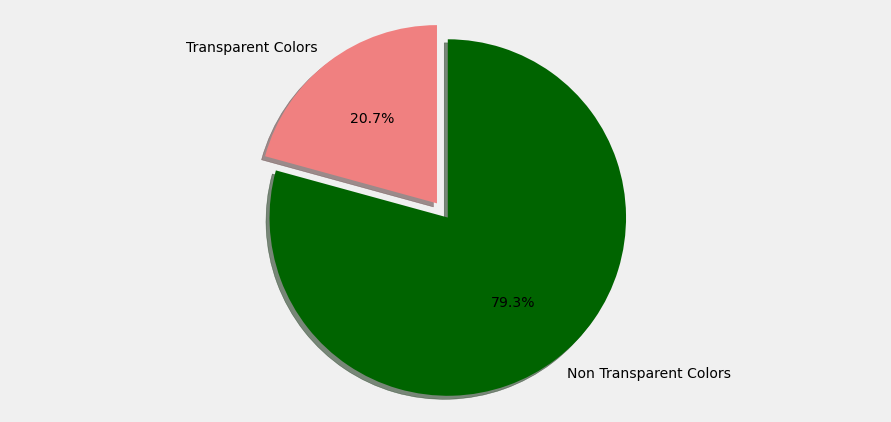

In [ ]:
# visualize transparent vs non transparent colors
transparent = colors_df['is_trans'] == 't'
Non_transparent = colors_df['is_trans'] == 'f'

# data to plot
labels = 'Transparent Colors', 'Non Transparent Colors'
sizes = [transparent.sum(), Non_transparent.sum()]
colors = ['lightcoral', 'darkgreen']

# explode 1st slice
explode = (0.1, 0) 

fig, axs = plt.subplots(figsize=(14, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [ ]:
# checking first twenty rows for part_categories csv file
part_categories = pd.read_csv('/content/part_categories.csv')
part_categories.head(10)

,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special
5,6,Bricks Wedged
6,7,Containers
7,8,Technic Bricks
8,9,Plates Special
9,10,Tiles Printed


In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in lagos if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(lagos)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
        


In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(lagos, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
colors_filename  = pd.read_csv('/content/colors.csv', delimiter=',', nrows = nRowsRead)
colors_filename .dataframeName ='/content/colors.csv'
nRow, nCol = lagos.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 135 rows and 4 columns


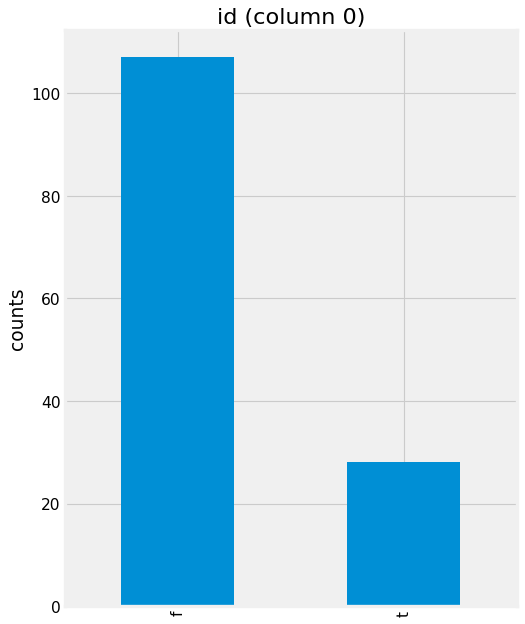

In [ ]:
plotPerColumnDistribution(lagos, 12, 6)


<ipython-input-67-a0343c621274>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


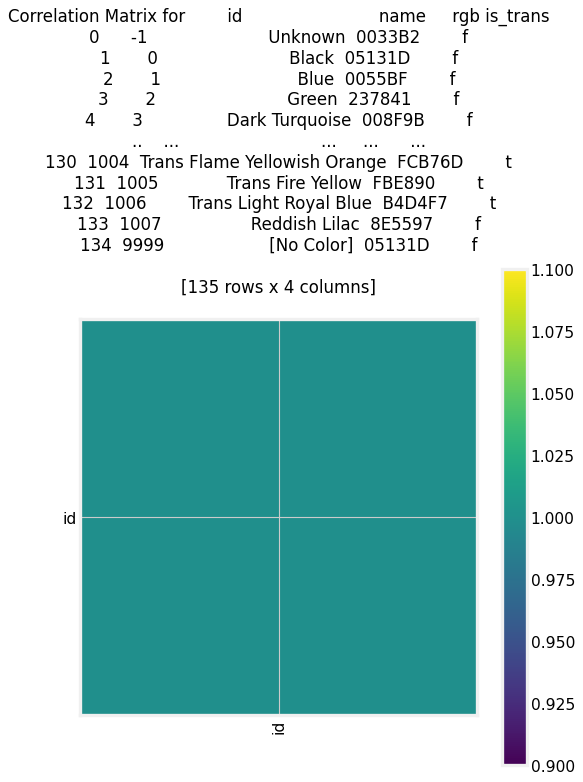

In [ ]:
# correlation of matrix 
plotCorrelationMatrix(lagos, 8)


In [ ]:
nRowsRead = 1000 
lagos2= pd.read_csv('/content/inventory_parts.csv', delimiter=',', nrows = nRowsRead)
lagos2.dataframeName = '/content/inventory_parts.csv'
nRow, nCol =lagos.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 135 rows and 4 columns


In [ ]:
lagos.head(4)

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f


Text(0.5, 1.0, 'Spare bar chart')

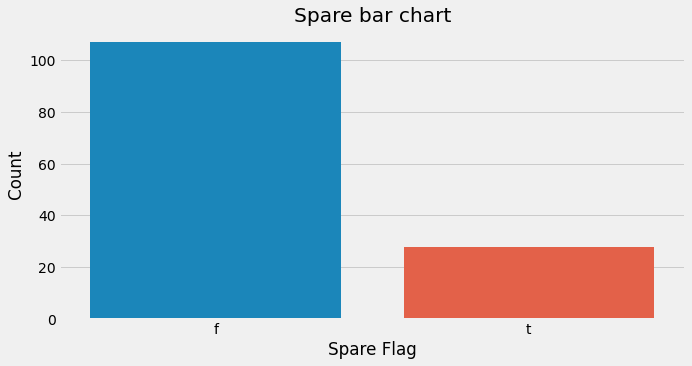

In [ ]:
plt.figure(figsize=(10,5))
ax= sns.countplot(x='is_trans',data=lagos)
#plt.xticks(rotation= 60)
plt.xlabel('Spare Flag')
plt.ylabel('Count')
plt.title('Spare bar chart')

<ipython-input-67-a0343c621274>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


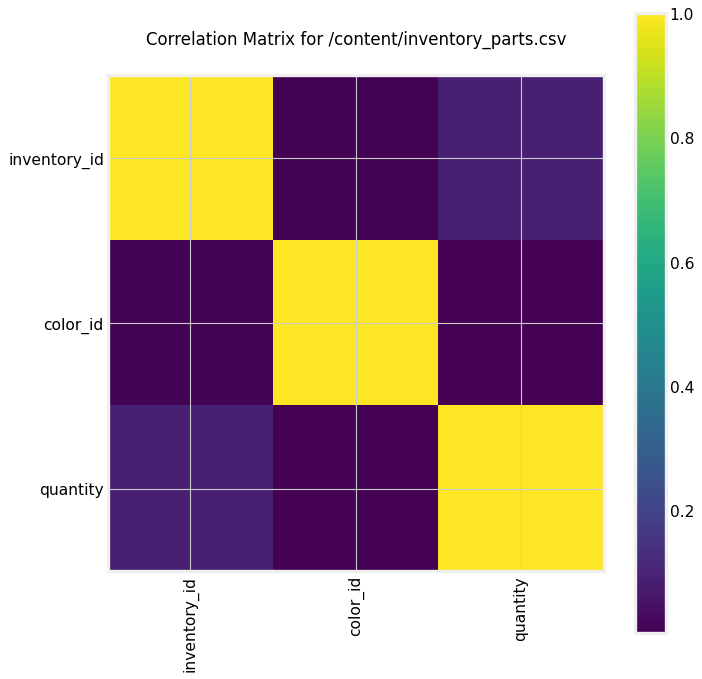

In [ ]:
plotCorrelationMatrix(lagos2, 10)

In [ ]:
from time import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform

In [ ]:
# read the data from the csv files into a dataframe
themes = pd.read_csv('/content/themes.csv', index_col=0)
sets = pd.read_csv('/content/sets.csv', index_col=0)
parts = pd.read_csv('/content/parts.csv', index_col=0)
part_categories = pd.read_csv('/content/part_categories.csv', index_col=0)
inventories = pd.read_csv('/content/inventories.csv', index_col=0)
inventory_sets = pd.read_csv('/content/inventory_sets.csv', index_col=0)
inventory_parts = pd.read_csv('/content/inventory_parts.csv', index_col=0)
colors = pd.read_csv('/content/colors.csv', index_col=0)

In [ ]:
dataset = pd.merge(
    colors, 
    parts, 
    left_on='id', 
    right_on='part_cat_id')

In [ ]:
dataset

,name_x,rgb,is_trans,name_y,part_cat_id
0,Blue,0055BF,f,Baseplate 16 x 30 with Set 080 Yellow House Print,1
1,Blue,0055BF,f,Baseplate 16 x 24 with Set 080 Small White Hou...,1
2,Blue,0055BF,f,Baseplate 16 x 24 with Set 080 Red House Print,1
3,Blue,0055BF,f,Baseplate 16 x 24 with Set 080 Large White Hou...,1
4,Blue,0055BF,f,Baseplate 24 x 32,1
...,...,...,...,...,...
23252,Trans-Neon Orange,FF800D,t,Duplo Figure - Male with Parted Wavy Hair and ...,57
23253,Trans-Neon Orange,FF800D,t,Duplo Figure - Male with Parted Wavy Hair and ...,57
23254,Trans-Neon Orange,FF800D,t,Duplo Figure - Male with Parted Wavy Hair and ...,57
23255,Trans-Neon Orange,FF800D,t,Duplo Figure - Male with Parted Wavy Hair and ...,57


In [ ]:
from os import name
X = dataset.loc[:, ['is_trans', 'name_y', 'part_cat_id']]
y = dataset.loc[:, 'rgb'].values

In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), 
    ['is_trans', 'name_y', 'part_cat_id'])],
    remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[ 1  1  1 ... 40 40 40]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

TypeError: ignored

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)





ValueError: ignored

##EDA Visuals